![image.png](logo.png)

# Cv_Classifier_Word2Vec

In [1]:
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup 
import re # For regular expressions

from nltk.corpus import stopwords

In [2]:
DataSet = pd.read_csv("DataSet.csv")
DataSet.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
DataSet.shape

(962, 2)

In [4]:
print("Affichage des différentes catégories de CV -")
print(DataSet['Category'].unique())

Affichage des différentes catégories de CV -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [5]:
print ("Affichage des différentes catégories de CV et du nombre d'enregistrements appartenant à chaque catégorie -")
print (DataSet['Category'].value_counts())

Affichage des différentes catégories de CV et du nombre d'enregistrements appartenant à chaque catégorie -
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
Mechanical Engineer          40
Data Science                 40
ETL Developer                40
Operations Manager           40
Sales                        40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


In [6]:
# Cette fonction convertit un texte en une séquence de mots.
def resume_wordlist(resume, remove_stopwords=False):
    # 1. Suppression des tag html
    resume_text = BeautifulSoup(resume).get_text()
    # 2. Suppression des ponctuation et caractères spéciaux.
    resume_text = re.sub("[^a-zA-Z]"," ",resume_text)
    # 3. Conversion en minuscules et séparation des mots
    words = resume_text.lower().split()
    # 4. Supprimer éventuellement les mots vides
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)

In [7]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [8]:
DataSet['cleaned_resume'] = DataSet.Resume.apply(lambda x: cleanResume(x))
print (DataSet['cleaned_resume'][31])

Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github com

In [9]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import matplotlib as plt


oneSetOfStopWords = set(stopwords.words('english')+['``',"''",'Exprience', 'Skill', 'SKILLS'])
totalWords =[]
Sentences = DataSet['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Details', 484), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72), ('Used', 72), ('Skills', 70)]


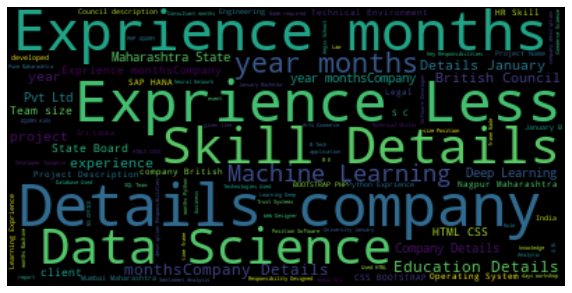

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
import nltk.data

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def resume_sentences(resume, tokenizer, remove_stopwords=False):
    # 1. Utilisation du tokenizer nltk
    raw_sentences = tokenizer.tokenize(resume.strip())
    sentences = []
    # 2. Boucle pour chaque phrase
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(resume_wordlist(raw_sentence, remove_stopwords))

    # Cela renvoie la liste des listes
    return sentences


In [12]:
sentences = []
print("Analyse des phrases de l'ensemble d'entraînement")
for resume in DataSet["Resume"]:
    sentences += resume_sentences(resume, tokenizer)

Analyse des phrases de l'ensemble d'entraînement


C:\Users\utilisateur\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [13]:
# Initialisation du modèle d'entrainement
from gensim.models import word2vec

model = word2vec.Word2Vec(sentences, workers=4,size=300,min_count=40,window=10,sample=0.001)
model.save("CV_Classifier_model")

In [14]:
model.wv.doesnt_match("java numpy spark math".split())

C:\Users\utilisateur\anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'java'

In [15]:
# les mots les plus similaires présents dans le modèle
model.wv.most_similar("python")

[('java', 0.8842402100563049),
 ('spark', 0.8771407604217529),
 ('core', 0.8733908534049988),
 ('mapreduce', 0.8600660562515259),
 ('numpy', 0.8599684238433838),
 ('j', 0.8492105007171631),
 ('language', 0.833635687828064),
 ('hdfs', 0.8265126943588257),
 ('oozie', 0.82306307554245),
 ('scala', 0.8210861682891846)]

In [16]:
model.wv.most_similar("html")

[('css', 0.9788991212844849),
 ('javascript', 0.9749742746353149),
 ('jquery', 0.9659852981567383),
 ('angular', 0.9509626626968384),
 ('php', 0.9399495124816895),
 ('hibernate', 0.9391705989837646),
 ('spring', 0.9363077878952026),
 ('js', 0.9362497329711914),
 ('django', 0.9283460974693298),
 ('node', 0.9282156825065613)]

### Sac des centroïdes

In [17]:
from sklearn.cluster import KMeans 
import time 

start = time.time() # Heure de début
# Définir «k» (num_clusters) sur 1 / 5ème de la taille du vocabulaire, ou une moyenne de 5 mots par cluster 
word_vectors = model.wv.syn0
num_clusters = int(word_vectors.shape[0] / 5) 

print("Le nombre de clusters: {}".format(num_clusters)) 


# Initaliser un objet k-means et l'utiliser pour extraire les centroïdes 
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# Obtenir l'heure de fin et imprimer la durée du processus
end = time.time() 
elapsed = end - start 
print("Temps nécessaire pour la mise en cluster de K Means: ", elapsed, "seconds.")

<ipython-input-17-045881099b19>:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  word_vectors = model.wv.syn0


Le nombre de clusters: 295
Temps nécessaire pour la mise en cluster de K Means:  33.48624634742737 seconds.


In [18]:
# Créer un dictionnaire de mots / index, en mappant chaque mot de vocabulaire à un numéro de cluster
word_centroid_map = dict(zip( model.wv.index2word, idx ))

Le word_centroid_map stocke à quel cluster le mot appartient.

In [19]:
# Pour les 5 premiers clusters 
for cluster in range(0, 5): 

    # Imprimer l'impression du numéro de cluster ("\ nCluster {}". Format (cluster))

    # Trouver tous les mots pour ce numéro de cluster et l'imprimer
    
    words = []
    for k, v in word_centroid_map.items():
        if v == cluster: 
            words.append(k) 
        
    #Pour les 10 premiers clusters
    print("Cluster", words)

Cluster ['security']
Cluster ['its', 'credit', 'events', 'direct', 'if', 'transaction', 'managed', 'costs', 'transactions', 'satisfaction', 'facility', 'past', 'transport', 'invoices', 'run', 'find', 'established', 'stores', 'aim', 'proactively', 'tax', 'payments', 'respective', 'regulations', 'phone', 'suggest', 'patient', 'benefits', 'outstanding', 'volume', 'tat', 'imports']
Cluster ['qc', 'x', 'upgrade', 'sdlc', 'matlab', 'central', 'visio', 'exposure', 'installed', 'full', 'dhcp', 'upgrades', 'profiles', 'bangalore', 'grid', 'competencies', 'mac']
Cluster ['state', 'board']
Cluster ['infrastructure', 'taking', 'capacity', 'structure', 'iso', 'validation', 'reviewed', 'controllers', 'fixes', 'scheduled', 'recovery', 'hiring', 'incident', 'schema', 'lan', 'insulation', 'highlights', 'hot', 'connectivity', 'warehousing', 'ht', 'win']


In [20]:
# Maintenant, décortiquons le word_centroid_map

print("vidage du word_centroid_map ...") 
with open("word_centroid_map.pickle", "wb") as f: 
    import pickle 
    pickle.dump(word_centroid_map, f)

vidage du word_centroid_map ...


Nous pouvons maintenant charger word_centroid_map à partir du fichier enregistré sans effectuer de nouveau clustering.

In [21]:
# charger le word_centroid_map 
print("word_centroid_map loading ...") 
with open("word_centroid_map.pickle", "rb") as f: 
    import pickle 
    word_centroid_map = pickle.load(f)

word_centroid_map loading ...


Dorenavant, même si la qualité entre les clusters varie, nous avons sécurisé des mots groupés, en d'autres termes, des mots qui ont chacun des centres de gravité. Nous pouvons l'utiliser pour créer des sacs de centroïdes.

En fin de compte, nous regroupons des mots similaires et faisons des Bag of Words. Étant donné que des mots similaires sont regroupés, cela signifie qu'il devient Bag Of Clusters, et parce que le cluster est centroïde, c'est un Bag Of Centroïdes. Il peut être vu comme une forme avancée de Stemming ou Lemmatizing, qui lie le casting du même mot.

In [22]:
def create_bag_of_centroids( wordlist, word_centroid_map ): 

    # Le nombre de clusters est égal à l'index de cluster le plus élevé dans la carte mot / centroïde
    num_centroids = max( word_centroid_map.values() ) + 1 

    # Pré-allouer le vecteur bag_of_centroids (pour la vitesse)
    bag_of_centroids = np.zeros( num_centroids, dtype="float32" ) 

    # Faisons une boucle sur les mots de la critique. Si le mot est dans le vocabulaire, 
    #trouvons à quel cluster il appartient et incrémentons ce nombre de cluster de un:
    for word in wordlist: 
        if word in word_centroid_map: 
            index = word_centroid_map[word] 
            bag_of_centroids[index] += 1 

    # Retourner le "bag of centroids" 
    return bag_of_centroids

### Classification 

Fabriquons un train/test set.

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DataSet['cleaned_resume'], DataSet['Category'], test_size=200, random_state=42)

Créons maintenant nos sacs de centroïdes de train et de test avec notre fonction.

In [61]:
# Pour des raisons d'optimisation, on alloue un array de zéros pour le sac de centroids de train
train_centroids = np.zeros( (X_train.size, int(num_clusters)), dtype="float32" )
print(train_centroids.shape)

# Transform the training set reviews into bags of centroids
counter = 0
for resume in X_train:
    train_centroids[counter] = create_bag_of_centroids(resume, word_centroid_map )
    counter += 1

(762, 295)


In [62]:
test_centroids = np.zeros( (X_test.size, int(num_clusters)), dtype="float32" )
print(test_centroids.shape)

# Transform the training set reviews into bags of centroids
counter = 0
for resume in X_test :
    test_centroids[counter] = create_bag_of_centroids(resume, word_centroid_map )
    counter += 1

(200, 295)


Créons maintenant un modèle de classification du type Random Forest. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instanciation :
forest = RandomForestClassifier(n_estimators = 100)

# On fit la forêt sur le train :
forest = forest.fit(train_centroids,y_train)

# On fait la prédiction sur le test :
result = forest.predict(test_centroids)

print(result)

In [64]:
from sklearn.metrics import accuracy_score

# Vérifions la précision de notre prédiction :
precision = accuracy_score(y_test, result)
print("Précision du modèle :", precision)

Précision du modèle : 0.985


### Prédiction sur un nouveau CV

Nous allons à présent utiliser l'algorithme pytesseract de google pour convertir un cv sous forme d'image vers du texte et puis utiliser notre modèle pour prédire la catégorie du cv.

In [110]:
import cv2

# On charge une variable avec un cv sous forme d'image.
cv_image = cv2.imread('cv_exemple.png', 0)

In [112]:
import pytesseract

#supposé améliorer la lecture du texte
cv_test = pytesseract.image_to_string(cv_image, lang='eng')

In [113]:
# Voyons le texte extrait par l'algorithme :
cv_test

"Diana Dawa\n\nData Scientist\n\nData Scientist with 4+ years of broad—based experience in building data-intensive applications, overcoming\ncomplex architectural, and scalability issues in diverse industries. Proﬁcient in predictive modeling, data\nprocessing, and data mining algorithms, as well as scripting languages, including Python and Java Capable\nof creating, developing, testing, and deploying highly adaptive diverse services to translate business and\nfunctional qualiﬁcations into substantial deliverables.\n\n \n\n>14 diana@novoresume.com\nO PaloAlto,CA\n\nin |inkedin.com/in/diana.dawa\n\nWORK EXPERIENCE\n\nData Scientist\n\nFuture Energy Ltd.\n06/2078 , Present Palo Alto, CA\n\n- Develop action plans to mitigate risks in decision making\nwhile increasing proﬁtability by leveraging data science,\n\n‘ Drive the interaction and partnership between the managers\nto ensure active cooperation in identifying as well as deﬁning\nanalytical needs, and generating the puII-through of in

In [114]:
exemple_clean = cleanResume(cv_test)
exemple_centroids = create_bag_of_centroids(exemple_clean, word_centroid_map )

In [115]:
prediction_cv_exemple = forest.predict(exemple_centroids.reshape(1, -1))
print("Le cv a été identifié comme appartenant à la catégorie :", prediction_cv_exemple[0]+".")

Le cv a été identifié comme appartenant à la catégorie : Database.
